---
title: Homework 02
---

In [3]:
#|include: false
%load_ext autoreload
%autoreload 2

## Question 1

> Obtain FGM data from THM (Level 1) or MMS (L2) or from ground based magnetometers (gmags) and plot it using SPEDAS (cmd line or gui, IDL or python).

If you are unsure which date to pick you can use:

- For THEMIS data: 2008-02-26/04-06 UT (P3-5 or D,E,A) [see plots [here](https://www.science.org/doi/10.1126/science.1160495)]
- For ground-based magnetometer data: same as above (e.g., stations Gillam, or Carson City, NV) [plots here]
- For MMS data: 2015-10-16/08-14 UT (MMS1-4) [see plot here]

In [4]:
import pyspedas
from pytplot import tplot, get_data, store_data, options
from pipe import select

In [5]:
#| output: false
trange = ['2008-02-26T04:00', '2008-02-26T06:00']
probes = ['d', 'e', 'a']

pyspedas.themis.fgm(trange=trange, probe=probes, level='l1', time_clip=True)

26-Oct-23 10:01:21: Downloading remote index: http://themis.ssl.berkeley.edu/data/themis/thd/l1/fgm/2008/
26-Oct-23 10:01:21: File is current: /Users/zijin/data/themis/thd/l1/fgm/2008/thd_l1_fgm_20080226_v01.cdf
26-Oct-23 10:01:21: Downloading remote index: http://themis.ssl.berkeley.edu/data/themis/the/l1/fgm/2008/
26-Oct-23 10:01:21: File is current: /Users/zijin/data/themis/the/l1/fgm/2008/the_l1_fgm_20080226_v01.cdf
26-Oct-23 10:01:21: Downloading remote index: http://themis.ssl.berkeley.edu/data/themis/tha/l1/fgm/2008/
26-Oct-23 10:01:21: File is current: /Users/zijin/data/themis/tha/l1/fgm/2008/tha_l1_fgm_20080226_v01.cdf
26-Oct-23 10:01:24: Problem time clipping: tha_fge
26-Oct-23 10:01:24: Time clip was applied to: tha_fgl
26-Oct-23 10:01:25: Problem time clipping: tha_fgh
26-Oct-23 10:01:25: Time clip returns empty data.
26-Oct-23 10:01:25: Time clip was applied to: thd_fgl
26-Oct-23 10:01:25: Time clip was applied to: thd_fgh
26-Oct-23 10:01:25: Time clip returns empty data.


['tha_fge',
 'tha_fgl',
 'tha_fgh',
 'thd_fge',
 'thd_fgl',
 'thd_fgh',
 'the_fge',
 'the_fgl',
 'the_fgh']

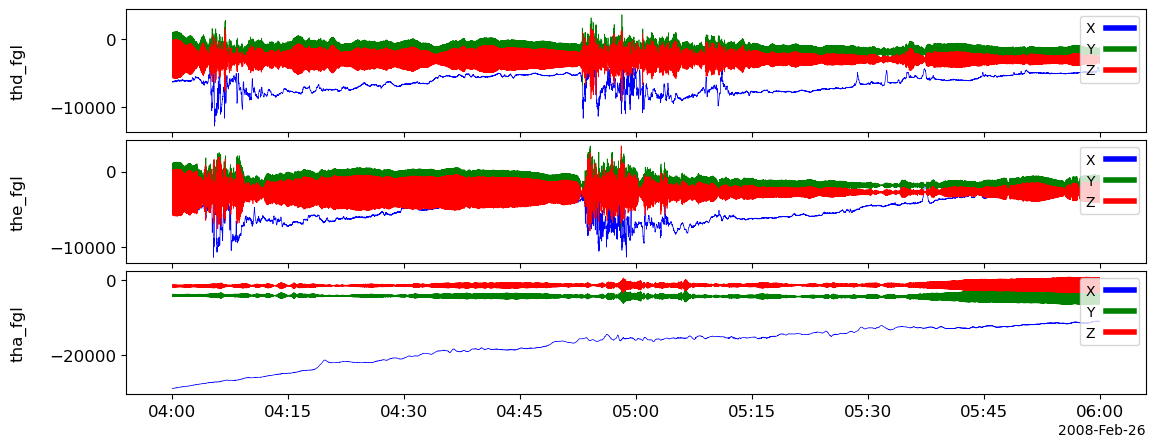

In [6]:
datatype = 'fgl'
tvar_format = "th{probe}_{datatype}"
tvars =  list(probes | select(lambda x: tvar_format.format(probe=x, datatype=datatype)))

tplot(tvars)

## Question 2

> Process your data: compute the total field from its components and plot it in the same panel as the three components using colors b/g/r/black for x/y/z/t.

In [ ]:
from xarray_einstats import linalg
from pytplot import split_vec, join_vec

We define a utility function to compute the total field from its components, see below

In [7]:

def _tvectot(tvar: str, new_name: str, join_component: bool):
    data = get_data(tvar, xarray=True)
    new_data = linalg.norm(data, dims="v_dim")
    store_data(new_name, new_data, xarray=True)
    
    if join_vec:
        join_vec(split_vec(tvar)+[new_name], new_name)
        options(new_name, 'legend_names', ['x', 'y', 'z', 'Magnitude'])
    else:
        options(new_name, 'legend_names', 'Magnitude')
    return new_name

def tvectot(tvars: str | list[str], newnames: str | list[str] = None, suffix="_mag", join_component=False) -> str | list[str]:
    """
    Computes the magnitude of a vector time series.

    Parameters
    ----------
    - tvars : Names of the tplot variables.
    - new_names: Names for the resultant magnitude tplot variables. If not provided, it appends the suffix to `tvars`.
    - suffix: The suffix to append to tensor_names to form new_names if new_names is not provided.
    - join_component: If True, the magnitude tplot variable is joined with the component tplot variables.

    Returns
    -------
    Names of the magnitude tplot variables.
    """
    tvars_type = type(tvars)
    if tvars_type == str:
        tvars = [tvars]
    if join_vec:
        suffix = "_tot"

    if newnames is None:
        newnames = [tvar + suffix for tvar in tvars]

    for tvar, newname in zip(tvars, newnames):
        _tvectot(tvar, newname, join_component)
    
    if tvars_type == str:
        return newnames[0]
    else:
        return newnames

In [8]:
tvar_tots = tvectot(tvars, join_component=True)
tplot(tvar_tots)

TypeError: store_data() got an unexpected keyword argument 'xarray'

## Question 3

> Show the locations of the spacecraft or the ground-based station you used above in relevant geophysical coordinates (GSE, GSM, MAG, …) from a webbased tool (tipsod or other) or plot it in SPEDAS (you can find cribs for that).

THEMIS website provides good summary plot of the spacecraft locations in various coordinate systems, see [here](http://themis.ssl.berkeley.edu/summary.php?sumType=orb&type=orbit)

![](http://themis.ssl.berkeley.edu/themisdata/thg/l0/asi/2008/02/orbit_2008-02-26_0406.gif)